In [1]:
import pandas as pd

folder = 'fake'
flights_path = 'AED2324_PRJ2_G19/dataset/' + folder + '/flights.csv'
airports_path = 'AED2324_PRJ2_G19/dataset/' + folder + '/airports.csv'
df_flights = pd.read_csv(flights_path)
df_airports = pd.read_csv(airports_path)

In [2]:
df_filter = df_flights[df_flights['Source'] == 'GRU']

df_merged = pd.merge(df_filter, df_airports[['Code','Country']], left_on='Target', right_on='Code', how='left')
df_merged = df_merged[['Source','Target','Country']]

print(df_merged.head())

qtd_distinct = df_merged.nunique().iloc[2] # Country column

print("Number of distinct airports target:", qtd_distinct)

  Source Target        Country
0    GRU    PRA         Brazil
1    GRU    JFK  United States
2    GRU    JFK  United States
3    GRU    JFK  United States
4    GRU    FNC       Portugal
Number of distinct airports target: 5


In [3]:
count_cities = df_airports.groupby(['City', 'Country']).size().reset_index(name='Count')
count_cities = count_cities[count_cities['Count'] > 1]
count_cities = count_cities.sort_values(by=['Count'], ascending=False)


print(count_cities)

Empty DataFrame
Columns: [City, Country, Count]
Index: []


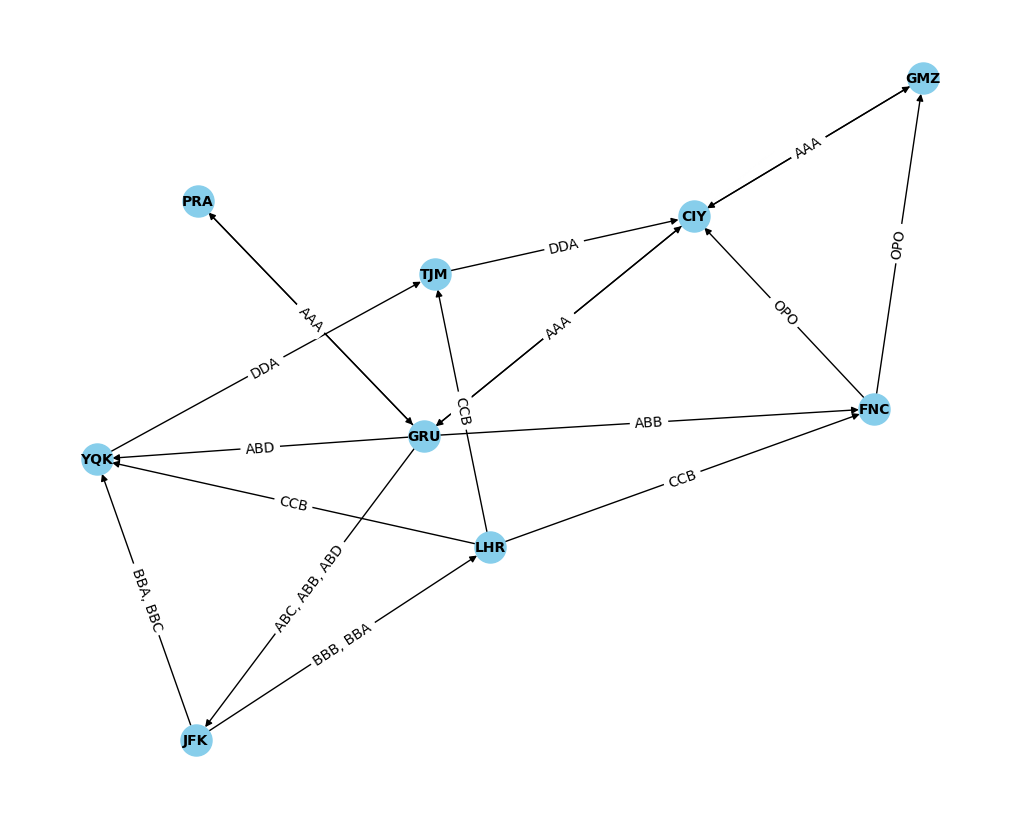

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

vertices_df = pd.read_csv(airports_path)
edges_df = pd.read_csv(flights_path)

#edges_df = edges_df.loc[edges_df['Source'] != 'LHR']
#edges_df = edges_df.loc[edges_df['Target'] != 'LHR']

G = nx.DiGraph()

for _, vertex in vertices_df.iterrows():
    G.add_node(vertex['Code'], label=vertex['Code'])

for _, edge in edges_df.iterrows():
    source = edge['Source']
    target = edge['Target']
    airline = edge['Airline']

    if G.has_edge(source, target):
        G[source][target]['airlines'].add(airline)
    else:
        G.add_edge(source, target, airlines={airline})

pos = nx.spring_layout(G)  
edge_labels = {(source, target): ', '.join(airlines) for source, target, airlines in G.edges(data='airlines')}

plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()